<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/main/cifar10_cnn_RGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install tensorflow

In [3]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [7]:
x_train.shape # this means 50000 images with 32*32(WIDTH, HEIGHT) pixel with rgb channels as 3

(50000, 32, 32, 3)

In [9]:
x_train[0].shape

(32, 32, 3)

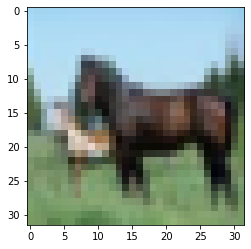

In [12]:
plt.imshow(x_train[12])

In [13]:
x_train[0].max()

255

In [14]:
x_train[0].min()

0

In [15]:
x_train = x_train/255

In [16]:
x_test = x_test/255

In [17]:
x_test.shape

(10000, 32, 32, 3)

In [18]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_cat_train = to_categorical(y_train,10)

In [21]:
y_cat_test = to_categorical(y_test,10)

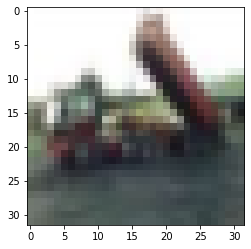

In [25]:
plt.imshow(x_train[2])

In [30]:
y_train[2]

array([9], dtype=uint8)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [32]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(32,32,3),activation='relu')) #(32,32,3)(width,height,color channel)

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(32,32,3),activation='relu')) #(32,32,3)(width,height,color channel)

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()) #flatten here by 28*28 = 784 neurons

model.add(Dense(256,activation='relu'))


#outputlayer -->multiclass
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
earlystop = EarlyStopping(monitor='val_loss',patience=2)

In [38]:
model.fit(x_train,y_cat_train,epochs=15,
          validation_data=(x_test,y_cat_test),callbacks=[earlystop])

Epoch 1/15
1563/1563 [==============================] - 69s 43ms/step - loss: 1.4916 - accuracy: 0.4640 - val_loss: 1.3059 - val_accuracy: 0.5386
Epoch 2/15
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1690 - accuracy: 0.5901 - val_loss: 1.1829 - val_accuracy: 0.5798
Epoch 3/15
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0235 - accuracy: 0.6426 - val_loss: 1.0544 - val_accuracy: 0.6324
Epoch 4/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9079 - accuracy: 0.6853 - val_loss: 1.0359 - val_accuracy: 0.6441
Epoch 5/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8087 - accuracy: 0.7195 - val_loss: 0.9723 - val_accuracy: 0.6638
Epoch 6/15
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7236 - accuracy: 0.7456 - val_loss: 0.9632 - val_accuracy: 0.6735
Epoch 7/15
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6435 - accuracy: 0.7741 - val_loss: 1.0015 -

In [39]:
metrics = pd.DataFrame(model.history.history)

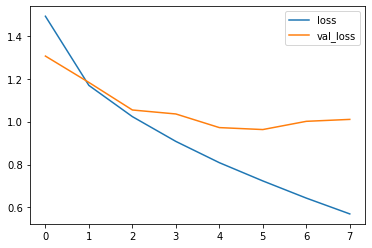

In [40]:
metrics[['loss','val_loss']].plot()

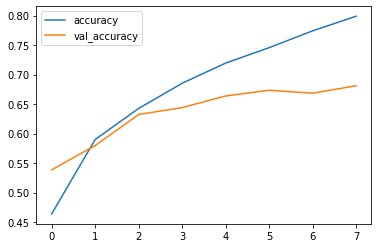

In [42]:
metrics[['accuracy','val_accuracy']].plot()

In [44]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.0105395317077637, 0.6811000108718872]

In [45]:
from sklearn.metrics import confusion_matrix,classification_report

In [46]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1000
           1       0.83      0.75      0.79      1000
           2       0.67      0.51      0.58      1000
           3       0.49      0.48      0.49      1000
           4       0.55      0.73      0.63      1000
           5       0.61      0.54      0.57      1000
           6       0.70      0.79      0.74      1000
           7       0.72      0.73      0.73      1000
           8       0.81      0.76      0.78      1000
           9       0.76      0.77      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [48]:
print(confusion_matrix(y_test,predictions))

[[752  18  39  22  46   6  12  13  56  36]
 [ 30 752  11  13  10  10  25   8  34 107]
 [ 69   4 513  73 148  60  58  46  17  12]
 [ 21   7  47 480 116 151  86  65  12  15]
 [ 19   0  45  48 734  32  55  50  10   7]
 [  8   5  40 197  87 542  48  61   6   6]
 [  4   6  34  56  76  19 785   7   6   7]
 [ 14   3  18  49  84  57  19 729   6  21]
 [ 84  45  12  14  18   9  15  10 759  34]
 [ 36  70   7  21  19   9  21  22  30 765]]


In [50]:
import seaborn as sns

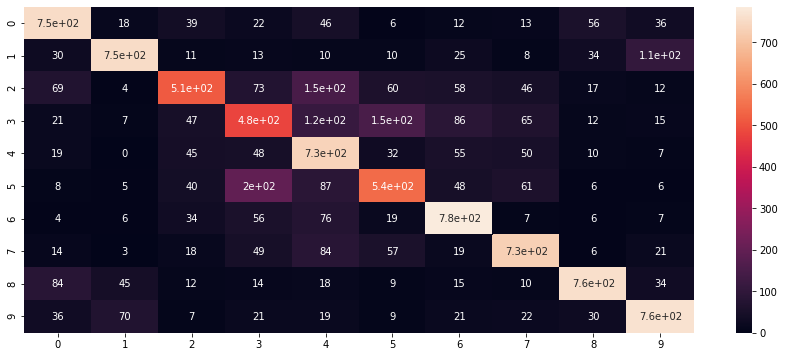

In [52]:
plt.figure(figsize=(15,6))

sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [53]:
my_image = x_test[0]

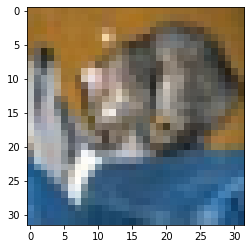

In [54]:
plt.imshow(my_image)

In [55]:
y_test[0]

array([3], dtype=uint8)

In [57]:
model.predict_classes(my_image.reshape(1,32,32,3))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3])